In [3]:
import tensorflow as tf
print(tf.__version__)

2023-01-09 02:38:27.177929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 02:38:27.461955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 02:38:27.461971: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 02:38:28.328044: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


In [4]:
import json
# Load the JSON data from the file
with open('laboro_tomato/_annotations/_train.json', 'r') as f:
  train_data = json.load(f)

In [5]:
categories = train_data["categories"]
annotations = train_data["annotations"]
images = train_data["images"]

In [6]:
# detail Classes
categories_id = [categories["id"] for categories in train_data["categories"]]
categories_name = [categories["name"] for categories in train_data["categories"]]
categories_supercategory = [categories["supercategory"] for categories in train_data["categories"]]
# detail images
images_id = [images["id"] for images in train_data["images"]]
images_file_name = [images["file_name"] for images in train_data["images"]]
images_coco_url = [images["coco_url"] for images in train_data["images"]]
images_height = [images["height"] for images in train_data["images"]]
images_width = [images["width"] for images in train_data["images"]]
images_date_captured = [images["date_captured"] for images in train_data["images"]]
images_flickr_url = [images["flickr_url"] for images in train_data["images"]]
# detail datasets
annotation_ids = [annotation["id"] for annotation in train_data["annotations"]]
annotation_category_id = [annotation["category_id"] for annotation in train_data["annotations"]]
annotation_image_id = [annotation["image_id"] for annotation in train_data["annotations"]]
annotation_segmentation = [annotation["segmentation"] for annotation in train_data["annotations"]]
annotation_iscrowd = [annotation["iscrowd"] for annotation in train_data["annotations"]]
annotation_bbox = [annotation["bbox"] for annotation in train_data["annotations"]]


,File Name,Category ID,Category Name,Segmentation,Bounding Box,Width,Height
0,IMG_20191215_112407.jpg,6,l_green,"[[1902.2016, 594.0896, 1983.9456, 634.0672, 20...","[1593.3528, 590.4704, 475.98720000000026, 508....",3120,4160
1,IMG_20191215_112407.jpg,4,l_fully_ripened,"[[1980.3264, 377.8944, 2029.3728, 285.25120000...","[1980.3264, 265.2416, 208.9151999999999, 303.4...",3120,4160
2,IMG_20191215_112407.jpg,6,l_green,"[[2287.3655999999996, 343.3664, 2323.7136, 321...","[2243.748, 312.49920000000003, 230.75520000000...",3120,4160
3,IMG_20191215_112407.jpg,6,l_green,"[[2756.1144, 530.5248, 2705.2272000000003, 561...","[2670.72, 530.5248, 228.91440000000011, 216.1952]",3120,4160
4,IMG_20191215_112407.jpg,6,l_green,"[[2690.688, 884.7904, 2747.004, 866.6112, 2785...","[2645.2608, 862.992, 214.4064000000003, 196.22...",3120,4160
5,IMG_20191215_112407.jpg,6,l_green,"[[2863.2864, 944.736, 2928.6816, 888.4096, 297...","[2846.9375999999997, 888.4096, 192.59760000000...",3120,4160
6,IMG_20191215_112407.jpg,6,l_green,"[[2140.1952, 1102.816, 2247.3984, 1075.568, 23...","[2052.9912, 1073.7376, 495.98640000000023, 490...",3120,4160
7,IMG_20191215_112407.jpg,6,l_green,"[[1729.6031999999998, 1280.864, 1809.5376, 125...","[1636.9392, 1259.0656, 363.35519999999997, 406...",3120,4160
8,IMG_20191215_112407.jpg,6,l_green,"[[1931.28, 1905.8208, 1976.676, 1884.0224, 202...","[1900.3919999999998, 1882.2335999999998, 210.7...",3120,4160
9,IMG_20191215_112407.jpg,6,l_green,"[[1609.7016, 2022.1344000000001, 1662.3672, 19...","[1582.4328, 1985.776, 234.37439999999992, 241....",3120,4160


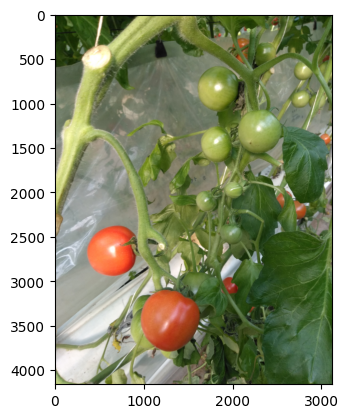

In [7]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Create the table as before
rows = []
nums = 600 # change number for show detail and image at id
for annotation in annotations:
    if annotation["image_id"] == nums:
        id = annotation["image_id"]
        im_id = images_id.index(id)
        file_n = images_file_name[im_id]
        cat_id = annotation["category_id"]
        for category in categories:
            if category["id"] == cat_id:
                cat_name = category["name"]
        rows.append({"File Name": file_n, "Category ID": cat_id, "Category Name": cat_name, "Segmentation": annotation["segmentation"], "Bounding Box": annotation["bbox"], "Width": images_width[im_id], "Height": images_height[im_id]})
table = pd.DataFrame(rows)
# Display the table and images
image_show = Image.open('laboro_tomato/.train/{}'.format(file_n))
plt.imshow(image_show)
display(table)


In [8]:
class Image:
    def __init__(self, id, file_name, width, height):
        self.id = id
        self.file_name = file_name
        self.width = width
        self.height = height

class Category:
    def __init__(self, id, name, supercategory):
        self.id = id
        self.name = name
        self.supercategory = supercategory

class Annotation:
    def __init__(self, id, category_id, image_id, segmentation, bbox, iscrowd):
        self.id = id
        self.category_id = category_id
        self.image_id = image_id
        self.segmentation = segmentation
        self.bbox = bbox
        self.iscrowd = iscrowd


In [9]:
images = []
for image_data in train_data["images"]:
    id = image_data["id"]
    file_name = image_data["file_name"]
    width = image_data["width"]
    height = image_data["height"]
    image = Image(id, file_name, width, height)
    images.append(image)

categories = []
for category_data in train_data["categories"]:
    id = category_data["id"]
    name = category_data["name"]
    supercategory = category_data["supercategory"]
    category = Category(id, name, supercategory)
    categories.append(category)

annotations = []
for annotation_data in train_data["annotations"]:
    id = annotation_data["id"]
    category_id = annotation_data["category_id"]
    image_id = annotation_data["image_id"]
    segmentation = annotation_data["segmentation"]
    bbox = annotation_data["bbox"]
    iscrowd = annotation_data["iscrowd"]
    annotation = Annotation(id, category_id, image_id, segmentation, bbox, iscrowd)
    annotations.append(annotation)

In [10]:
import json

train_data = {
    "images": [image.__dict__ for image in images],
    "categories": [category.__dict__ for category in categories],
    "annotations": [annotation.__dict__ for annotation in annotations],
}

with open("train_data.json", "w") as f:
    json.dump(train_data, f)
